**Project 3**

Kuei-Tzu Hu 206300553

Sreya Muppalla 505675909

Christina Lee 406299676

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ranking

## Question 13

**QUESTION 13: Data Understanding and Preprocessing:**

• Use the provided helper code for loading and pre-processing Web10k data.

In [2]:
!pip install lightgbm

In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import ndcg_score
import numpy as np

# Load the dataset for one fold
def load_one_fole(data_path):
    X_train, y_train, qid_train = load_svmlight_file(str(data_path + 'train.txt'), query_id=True)
    X_test, y_test, qid_test = load_svmlight_file(str(data_path + 'test.txt'), query_id=True)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
    _, group_train = np.unique(qid_train, return_counts=True)
    _, group_test = np.unique(qid_test, return_counts=True)
    return X_train, y_train, qid_train, group_train, X_test, y_test, qid_test, group_test

def ndcg_single_query(y_score, y_true, k):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

# calculate NDCG score given a trained model
def compute_ndcg_all(model, X_test, y_test, qids_test, k=10):
    unique_qids = np.unique(qids_test)
    ndcg_ = list()
    for i, qid in enumerate(unique_qids):
        y = y_test[qids_test == qid]

        if np.sum(y) == 0:
            continue

        p = model.predict(X_test[qids_test == qid])

        idcg = ndcg_single_query(y, y, k=k)
        ndcg_.append(ndcg_single_query(p, y, k=k) / idcg)
    return np.mean(ndcg_)

# get importance of features
def get_feature_importance(model, importance_type='gain'):
    return model.booster_.feature_importance(importance_type=importance_type)

In [4]:
datapath1 = "./MSLR-WEB10K/Fold1/"
datapath2 = "./MSLR-WEB10K/Fold2/"
datapath3 = "./MSLR-WEB10K/Fold3/"
datapath4 = "./MSLR-WEB10K/Fold4/"
datapath5 = "./MSLR-WEB10K/Fold5/"

X1_train, y1_train, qid1_train, group1_train, X1_test, y1_test, qid1_test, group1_test = load_one_fole(datapath1)
X2_train, y2_train, qid2_train, group2_train, X2_test, y2_test, qid2_test, group2_test = load_one_fole(datapath2)
X3_train, y3_train, qid3_train, group3_train, X3_test, y3_test, qid3_test, group3_test = load_one_fole(datapath3)
X4_train, y4_train, qid4_train, group4_train, X4_test, y4_test, qid4_test, group4_test = load_one_fole(datapath4)
X5_train, y5_train, qid5_train, group5_train, X5_test, y5_test, qid5_test, group5_test = load_one_fole(datapath5)

In [5]:
X_train = [X1_train, X2_train, X3_train, X4_train, X5_train]
y_train = [y1_train, y2_train, y3_train, y4_train, y5_train]
qid_train = [qid1_train, qid2_train, qid3_train, qid4_train, qid5_train]
group_train = [group1_train, group2_train, group3_train, group4_train, group5_train]

X_test = [X1_test, X2_test, X3_test, X4_test, X5_test]
y_test = [y1_test, y2_test, y3_test, y4_test, y5_test]
qid_test = [qid1_test, qid2_test, qid3_test, qid4_test, qid5_test]
group_test = [group1_test, group2_test, group3_test, group4_test, group5_test]

In [6]:
for i in np.arange(len(X_train)) :
    print(X_train[i].shape)

(723412, 136)
(716683, 136)
(719111, 136)
(718768, 136)
(722602, 136)


• Print out the number of unique queries in total and show distribution of relevance labels.

 - 6000 unique queries for each folders

In [7]:
# number of unique queries

for i in np.arange(len(group_train)) :
    print(group_train[i].shape)

(6000,)
(6000,)
(6000,)
(6000,)
(6000,)


In [8]:
y1, count1 = np.unique(y1_train, return_counts=True)
y2, count2 = np.unique(y2_train, return_counts=True)
y3, count3 = np.unique(y3_train, return_counts=True)
y4, count4 = np.unique(y4_train, return_counts=True)
y5, count5 = np.unique(y5_train, return_counts=True)

count = np.stack((count1, count2, count3, count4, count5))

In [9]:
count[0][1]

232569

In [10]:
from tabulate import tabulate

In [11]:
col_names = ["0", "1", "2", "3", "4"]

data = [["Fold 1 ", count[0][0], count[0][1], count[0][2], count[0][3], count[0][4]],
        ["Fold 2 ", count[1][0], count[1][1], count[1][2], count[1][3], count[1][4]],
        ["Fold 3 ", count[2][0], count[2][1], count[2][2], count[2][3], count[2][4]],
        ["Fold 4 ", count[3][0], count[3][1], count[3][2], count[3][3], count[3][4]],
        ["Fold 5 ", count[4][0], count[4][1], count[4][2], count[4][3], count[4][4]]]

print(tabulate(data, headers=col_names))

             0       1      2      3     4
------  ------  ------  -----  -----  ----
Fold 1  377957  232569  95082  12658  5146
Fold 2  373029  230368  95117  12814  5355
Fold 3  371725  232302  96663  12903  5518
Fold 4  372756  231727  96244  12712  5329
Fold 5  377322  231874  95247  12864  5295


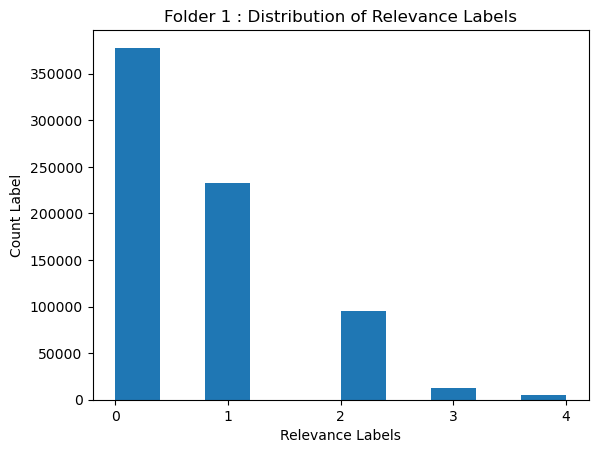

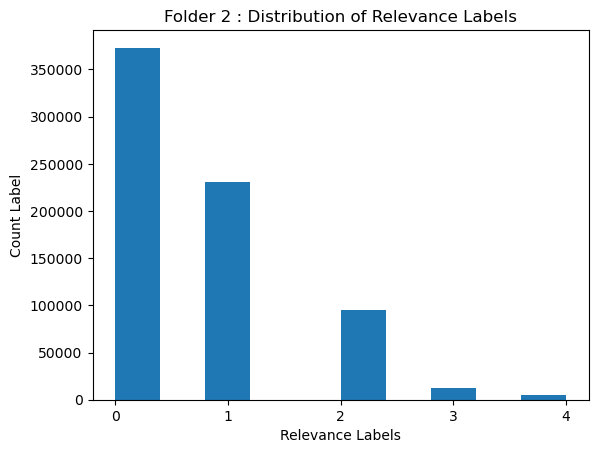

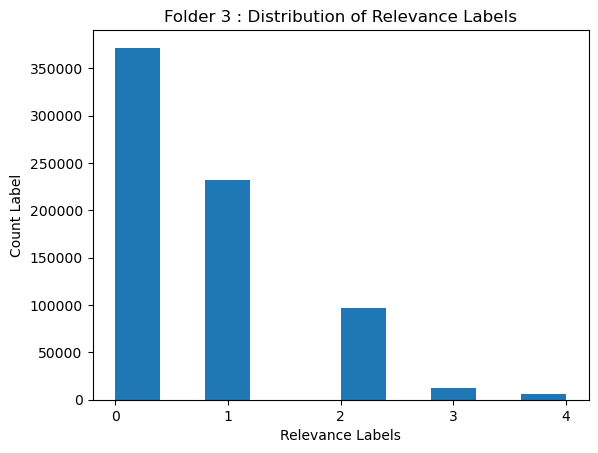

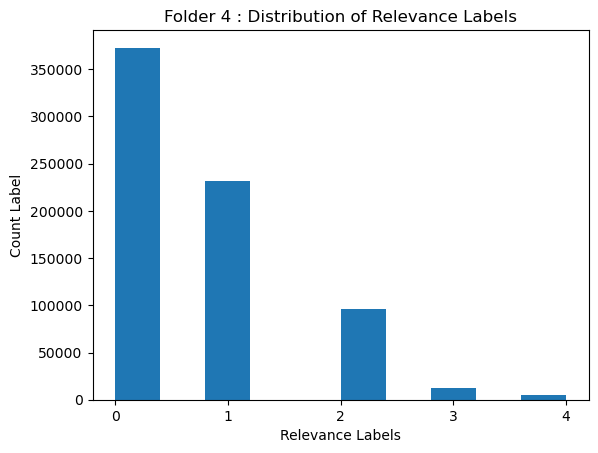

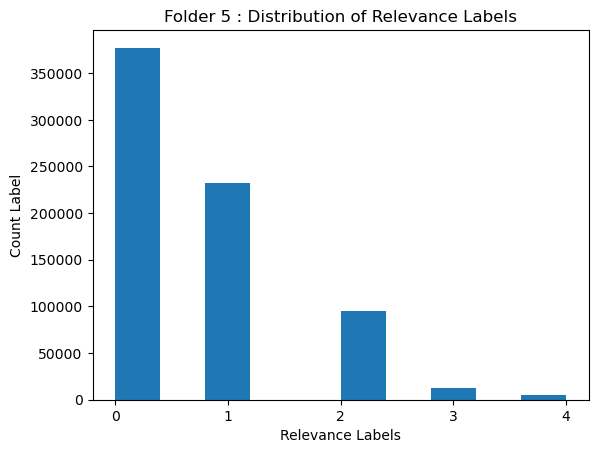

In [12]:
y_train = [y1_train, y2_train, y3_train, y4_train, y5_train]

for i in np.arange(5) :
  plt.figure()
  plt.hist(y_train[i])
  plt.xticks(np.arange(0, 4.5, 1))
  plt.xlabel("Relevance Labels");
  plt.ylabel("Count Label");
  plt.title(f"Folder {i + 1} : Distribution of Relevance Labels")

## Question 14

**QUESTION 14: LightGBM Model Training:**

For each of the five provided folds, train a LightGBM model using the ’lambdarank’ objective. After training, evaluate and report the model’s performance on the test set using nDCG@3, nDCG@5 and nDCG@10.

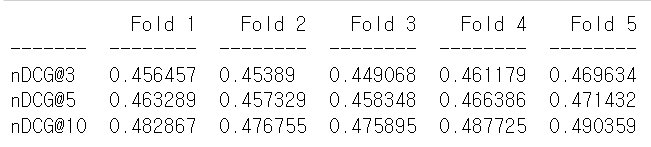

In [13]:
import lightgbm as lgb
gbm1 = lgb.LGBMRanker()
gbm2 = lgb.LGBMRanker()
gbm3 = lgb.LGBMRanker()
gbm4 = lgb.LGBMRanker()
gbm5 = lgb.LGBMRanker()

In [14]:
fold1 = gbm1.fit(X1_train, y1_train, group=group1_train)
fold2 = gbm2.fit(X2_train, y2_train, group=group2_train)
fold3 = gbm3.fit(X3_train, y3_train, group=group3_train)
fold4 = gbm4.fit(X4_train, y4_train, group=group4_train)
fold5 = gbm5.fit(X5_train, y5_train, group=group5_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.469313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25637
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.558580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25623
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.391367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25659
[LightGBM] [Info] Number of

In [15]:
folds = [fold1, fold2, fold3, fold4, fold5]
X_test = [X1_test, X2_test, X3_test, X4_test, X5_test]
y_test = [y1_test, y2_test, y3_test, y4_test, y5_test]
qid_test = [qid1_test, qid2_test, qid3_test, qid4_test, qid5_test]

In [16]:
ndcg3 = []
ndcg5 = []
ndcg10 = []

for i in np.arange(5) :
    n3 = compute_ndcg_all(folds[i], X_test[i], y_test[i], qid_test[i], k=3)
    n5 = compute_ndcg_all(folds[i], X_test[i], y_test[i], qid_test[i], k=5)
    n10 = compute_ndcg_all(folds[i], X_test[i], y_test[i], qid_test[i], k=10)
    ndcg3 = np.append(ndcg3, n3)
    ndcg5 = np.append(ndcg5, n5)
    ndcg10 = np.append(ndcg10, n10)

In [17]:
col_names = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

data = [["nDCG@3", ndcg3[0], ndcg3[1], ndcg3[2], ndcg3[3], ndcg3[4]],
        ["nDCG@5", ndcg5[0], ndcg5[1], ndcg5[2], ndcg5[3], ndcg5[4]],
        ["nDCG@10", ndcg10[0], ndcg10[1], ndcg10[2], ndcg10[3], ndcg10[4]]]

print(tabulate(data, headers=col_names))

           Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
-------  --------  --------  --------  --------  --------
nDCG@3   0.456457  0.45389   0.449068  0.461179  0.469634
nDCG@5   0.463289  0.457329  0.458348  0.466386  0.471432
nDCG@10  0.482867  0.476755  0.475895  0.487725  0.490359


**QUESTION 15: Result Analysis and Interpretation:**

For each of the five provided folds, list top 5 most important features of the model based on the importance score.  
Please use model.booster .feature importance(importance type=’gain’) as demonstrated here for retrieving importance score per feature. You can also find helper code in the provided notebook.

In [18]:
# Fold 1

importance_df1 = (
    pd.DataFrame({
        'feature_name': fold1.feature_name_,
        'importance_gain': get_feature_importance(fold1, importance_type='gain'),
        'importance_split': get_feature_importance(fold1, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df1.head())

  feature_name  importance_gain  importance_split
0   Column_133     23856.702951                92
1     Column_7      4248.546391                13
2   Column_107      4135.244450               116
3    Column_54      4078.463216                29
4   Column_129      3635.037024               146


In [19]:
# Fold 2

importance_df2 = (
    pd.DataFrame({
        'feature_name': fold2.feature_name_,
        'importance_gain': get_feature_importance(fold2, importance_type='gain'),
        'importance_split': get_feature_importance(fold2, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df2.head())

  feature_name  importance_gain  importance_split
0   Column_133     23578.908250                82
1     Column_7      5157.964912                18
2    Column_54      4386.669757                44
3   Column_107      4094.012172               105
4   Column_129      4035.070673               151


In [20]:
# Fold 3

importance_df3 = (
    pd.DataFrame({
        'feature_name': fold3.feature_name_,
        'importance_gain': get_feature_importance(fold3, importance_type='gain'),
        'importance_split': get_feature_importance(fold3, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df3.head())

  feature_name  importance_gain  importance_split
0   Column_133     23218.075441                80
1    Column_54      4991.303372                35
2   Column_107      4226.807395                93
3   Column_129      4059.752514               157
4     Column_7      3691.792320                11


In [21]:
# Fold 4

importance_df4 = (
    pd.DataFrame({
        'feature_name': fold4.feature_name_,
        'importance_gain': get_feature_importance(fold4, importance_type='gain'),
        'importance_split': get_feature_importance(fold4, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df4.head())

  feature_name  importance_gain  importance_split
0   Column_133     23796.899673                78
1     Column_7      4622.622978                15
2    Column_54      3883.481706                20
3   Column_129      3356.846980               158
4   Column_128      3207.575537               113


In [22]:
# Fold 5

importance_df5 = (
    pd.DataFrame({
        'feature_name': fold5.feature_name_,
        'importance_gain': get_feature_importance(fold5, importance_type='gain'),
        'importance_split': get_feature_importance(fold5, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df5.head())

  feature_name  importance_gain  importance_split
0   Column_133     23540.942354                92
1     Column_7      4794.945172                12
2    Column_54      4079.608554                27
3   Column_107      3514.835752                87
4   Column_129      3209.058444               146


**QUESTION 16: Experiments with Subset of Features:**

For each of the five provided folds:

 - Remove the top 20 most important features according to the computed importance score in the question 15. Then train a new LightGBM model on the resulted 116 dimensional queryurl data.  
Evaluate the performance of this new model on the test set using nDCG. Does the outcome align with your expectations? If not, please share your hypothesis regarding the potential reasons for this discrepancy.


Original Model nDCG : 

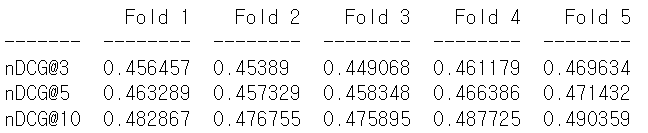

Drop 20 most important feature Model nDCG :

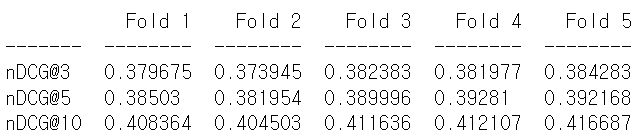


By removing the important 20 features for ranking the data, I expected for the DCG score to have a signoficant decrease. The outcome aligns with the expectations, as comparing to the original nDCG, the score decreased with every k and every folder by about 0.07.


In [23]:
feature1 = np.zeros(136)
feature2 = np.zeros(136)
feature3 = np.zeros(136)
feature4 = np.zeros(136)
feature5 = np.zeros(136)

for i in np.arange(136) : 
    feature1[i] = ''.join(x for x in importance_df1.feature_name[i] if x.isdigit())
    feature2[i] = ''.join(x for x in importance_df2.feature_name[i] if x.isdigit())
    feature3[i] = ''.join(x for x in importance_df3.feature_name[i] if x.isdigit())
    feature4[i] = ''.join(x for x in importance_df4.feature_name[i] if x.isdigit())
    feature5[i] = ''.join(x for x in importance_df5.feature_name[i] if x.isdigit())
    
features = [feature1, feature2, feature3, feature4, feature5]

In [24]:
print(feature1[2])

107.0


In [25]:
def dropcols_fancy(M, idx_to_drop):
    idx_to_drop = np.unique(idx_to_drop)
    keep = ~np.in1d(np.arange(M.shape[1]), idx_to_drop, assume_unique=True)
    return M[:, np.where(keep)[0]]

In [26]:
ind_drop20 = [features[0][0:20], features[1][0:20], features[2][0:20], features[3][0:20], features[4][0:20]]
print(ind_drop20)

[array([133.,   7., 107.,  54., 129., 128., 134.,  64., 126.,  14., 132.,
        13., 122., 125., 108., 130.,  29., 127., 109.,  48.]), array([133.,   7.,  54., 107., 129., 128., 132., 126.,  13., 134.,  10.,
       130., 125., 108.,  64.,  14., 122.,  48., 127.,  29.]), array([133.,  54., 107., 129.,   7., 128.,  13.,  14., 134., 126., 132.,
       130., 125., 114.,  29., 108., 127., 109.,  52.,  48.]), array([133.,   7.,  54., 129., 128., 107.,  13., 134.,  64.,  14., 132.,
       130., 126., 125., 108.,  29.,  47., 114.,  48., 127.]), array([133.,   7.,  54., 107., 129., 128., 134., 126.,  13., 132., 130.,
        48., 122.,  14.,  64., 125., 127., 108., 100.,  10.])]


In [27]:
X_train_drop20 = []
X_test_drop20 = []

for i in np.arange(5) :
    X_train_drop20 = np.append(X_train_drop20, dropcols_fancy(X_train[i], ind_drop20[i]))
    X_test_drop20 = np.append(X_test_drop20, dropcols_fancy(X_test[i], ind_drop20[i]))

In [28]:
print(X_train_drop20[4].shape)
print(X_train[4].shape)

(722602, 116)
(722602, 136)


In [29]:
print(X_train_drop20)

[<723412x116 sparse matrix of type '<class 'numpy.float64'>'
 	with 83915792 stored elements in Compressed Sparse Row format>
 <716683x116 sparse matrix of type '<class 'numpy.float64'>'
 	with 83135228 stored elements in Compressed Sparse Row format>
 <719111x116 sparse matrix of type '<class 'numpy.float64'>'
 	with 83416876 stored elements in Compressed Sparse Row format>
 <718768x116 sparse matrix of type '<class 'numpy.float64'>'
 	with 83377088 stored elements in Compressed Sparse Row format>
 <722602x116 sparse matrix of type '<class 'numpy.float64'>'
 	with 83821832 stored elements in Compressed Sparse Row format>]


In [30]:
gbm1_drop20 = lgb.LGBMRanker()
gbm2_drop20 = lgb.LGBMRanker()
gbm3_drop20 = lgb.LGBMRanker()
gbm4_drop20 = lgb.LGBMRanker()
gbm5_drop20 = lgb.LGBMRanker()

In [31]:
fold1_drop20 = gbm1_drop20.fit(X_train_drop20[0], y1_train, group=group1_train)
fold2_drop20 = gbm2_drop20.fit(X_train_drop20[1], y2_train, group=group2_train)
fold3_drop20 = gbm3_drop20.fit(X_train_drop20[2], y3_train, group=group3_train)
fold4_drop20 = gbm4_drop20.fit(X_train_drop20[3], y4_train, group=group4_train)
fold5_drop20 = gbm5_drop20.fit(X_train_drop20[4], y5_train, group=group5_train)

folds_drop20 = [fold1_drop20, fold2_drop20, fold3_drop20, fold4_drop20, fold5_drop20]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.648338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21582
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 116
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.054795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21551
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.381820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21720
[LightGBM] [Info] Number of data points in the train set: 719111, number of used features: 

In [32]:
ndcg3_drop20 = []
ndcg5_drop20 = []
ndcg10_drop20 = []

for i in np.arange(5) :
    n3_d20 = compute_ndcg_all(folds_drop20[i], X_test_drop20[i], y_test[i], qid_test[i], k=3)
    n5_d20 = compute_ndcg_all(folds_drop20[i], X_test_drop20[i], y_test[i], qid_test[i], k=5)
    n10_d20 = compute_ndcg_all(folds_drop20[i], X_test_drop20[i], y_test[i], qid_test[i], k=10)
    ndcg3_drop20 = np.append(ndcg3_drop20, n3_d20)
    ndcg5_drop20 = np.append(ndcg5_drop20, n5_d20)
    ndcg10_drop20 = np.append(ndcg10_drop20, n10_d20)

In [33]:
col_names = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

data = [["nDCG@3", ndcg3_drop20[0], ndcg3_drop20[1], ndcg3_drop20[2], ndcg3_drop20[3], ndcg3_drop20[4]],
        ["nDCG@5", ndcg5_drop20[0], ndcg5_drop20[1], ndcg5_drop20[2], ndcg5_drop20[3], ndcg5_drop20[4]],
        ["nDCG@10", ndcg10_drop20[0], ndcg10_drop20[1], ndcg10_drop20[2], ndcg10_drop20[3], ndcg10_drop20[4]]]

print(tabulate(data, headers=col_names))

           Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
-------  --------  --------  --------  --------  --------
nDCG@3   0.379675  0.373945  0.382383  0.381977  0.384283
nDCG@5   0.38503   0.381954  0.389996  0.39281   0.392168
nDCG@10  0.408364  0.404503  0.411636  0.412107  0.416687


In [34]:
importance_df1_drop20 = (
    pd.DataFrame({
        'feature_name': fold1_drop20.feature_name_,
        'importance_gain': get_feature_importance(fold1_drop20, importance_type='gain'),
        'importance_split': get_feature_importance(fold1_drop20, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df1_drop20.head())

  feature_name  importance_gain  importance_split
0    Column_47      7130.373842                26
1   Column_115      5221.429379               136
2     Column_9      3150.081209               184
3    Column_57      2859.952607                37
4    Column_52      2340.531604               115


In [35]:
importance_df2_drop20 = (
    pd.DataFrame({
        'feature_name': fold2_drop20.feature_name_,
        'importance_gain': get_feature_importance(fold2_drop20, importance_type='gain'),
        'importance_split': get_feature_importance(fold2_drop20, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df2_drop20.head())

  feature_name  importance_gain  importance_split
0    Column_46      7395.156866                24
1   Column_115      5048.871017               138
2    Column_56      2996.123232                39
3   Column_114      2575.246776               184
4    Column_51      2424.622715               109


In [36]:
importance_df3_drop20 = (
    pd.DataFrame({
        'feature_name': fold3_drop20.feature_name_,
        'importance_gain': get_feature_importance(fold3_drop20, importance_type='gain'),
        'importance_split': get_feature_importance(fold3_drop20, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df3_drop20.head())

  feature_name  importance_gain  importance_split
0    Column_24      5193.621002                 6
1   Column_115      4975.877589               147
2     Column_9      3713.671880               181
3    Column_56      3524.709081                46
4    Column_43      2704.906328               113


In [37]:
importance_df4_drop20 = (
    pd.DataFrame({
        'feature_name': fold4_drop20.feature_name_,
        'importance_gain': get_feature_importance(fold4_drop20, importance_type='gain'),
        'importance_split': get_feature_importance(fold4_drop20, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df4_drop20.head())

  feature_name  importance_gain  importance_split
0    Column_46      8002.362762                30
1   Column_115      4566.683576               133
2     Column_9      3429.345109               202
3    Column_51      2785.960996               110
4    Column_56      2668.623970                44


In [38]:
importance_df5_drop20 = (
    pd.DataFrame({
        'feature_name': fold5_drop20.feature_name_,
        'importance_gain': get_feature_importance(fold5_drop20, importance_type='gain'),
        'importance_split': get_feature_importance(fold5_drop20, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df5_drop20.head())

  feature_name  importance_gain  importance_split
0    Column_47      7827.671422                18
1   Column_115      4843.975987               127
2    Column_57      3432.321164                50
3    Column_43      2622.286555               114
4   Column_114      2455.116591               188


 - Remove the 60 least important features according to the computed importance score in the question 15. Then train a new LightGBM model on the resulted 76 dimensional query-url data.  
Evaluate the performance of this new model on the test set using nDCG. Does the outcome align with your expectations? If not, please share your hypothesis regarding the potential reasons for this discrepancy.

Original Model nDCG :

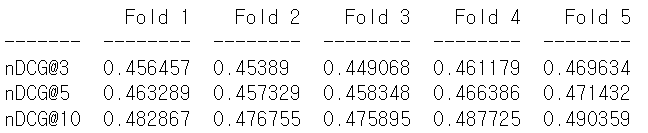

Drop 60 least important features Model nDCG :

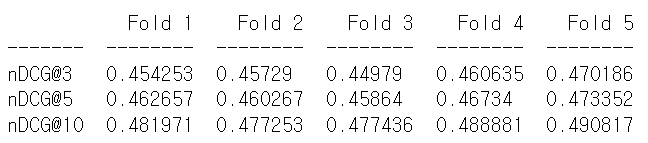


By removing the least important 60 features, I expected the nDCG score to decrease, but by a smaller degree than removing the top important 20 features. The least important features might not have much importance for training, but as almost half of the features are dropped I expected it to have a reasonable affect. As in result, the nDCG score remained almost the same, moslty very slightly decreasing, but in some cases, rather increasing. The reason of the consistance of the nDCG scores is, as shown below, that even though there are many features dropped, they have very low importance gain compared to the more important values. Therefore thay have very little affect to the ranking model. The slight increase of some of the scores could be caused by eliminating irrelevant features, enabling to focus on the more important features.

In [39]:
print(importance_df1[0:20])

   feature_name  importance_gain  importance_split
0    Column_133     23856.702951                92
1      Column_7      4248.546391                13
2    Column_107      4135.244450               116
3     Column_54      4078.463216                29
4    Column_129      3635.037024               146
5    Column_128      3141.889132               149
6    Column_134      2928.917522                94
7     Column_64      2473.033697                36
8    Column_126      2460.174453                80
9     Column_14      2398.556180                66
10   Column_132      2235.702615               114
11    Column_13      2173.701421                95
12   Column_122      1707.601828                52
13   Column_125      1586.174248               102
14   Column_108      1533.270157                61
15   Column_130      1530.053324               122
16    Column_29      1244.337857                37
17   Column_127      1143.260724                83
18   Column_109      1031.61257

In [40]:
print(importance_df1[76:136])

    feature_name  importance_gain  importance_split
76     Column_62        80.436729                13
77     Column_35        80.088470                14
78     Column_76        77.891471                 6
79     Column_89        77.751060                14
80     Column_30        76.663699                11
81     Column_55        74.273940                15
82     Column_79        68.735949                12
83     Column_81        67.386480                 4
84     Column_50        65.964510                12
85     Column_87        65.475030                11
86     Column_20        62.900810                14
87    Column_102        62.823020                12
88     Column_93        59.304261                 7
89     Column_40        59.196060                10
90     Column_57        56.855900                 7
91     Column_25        55.490171                10
92     Column_34        55.162021                 5
93     Column_67        54.072680                10
94     Colum

In [41]:
ind_drop60 = [features[0][76:136], features[1][76:136], features[2][76:136], features[3][76:136], features[4][76:136]]
print(ind_drop60)

[array([ 62.,  35.,  76.,  89.,  30.,  55.,  79.,  81.,  50.,  87.,  20.,
       102.,  93.,  40.,  57.,  25.,  34.,  67.,  45.,  75.,  69., 119.,
       113., 110., 101.,  84.,  38.,  77.,   1.,  78.,  94., 103.,   8.,
         9.,  90.,  68.,  37.,  61.,  27.,  41.,  66.,  51.,   3.,  32.,
         4.,  22.,  23.,  26.,  28.,  31.,  99.,  33.,  98.,  43.,  56.,
        91.,  95.,  96.,  97.,   0.]), array([102.,  93., 124.,   0., 120.,  51.,  22.,  55.,   9., 116.,  80.,
        30.,  57.,  82.,  34.,  85.,  94.,  77., 111.,  39.,  37.,  42.,
        36.,  90.,  78.,  67.,  86.,  38.,  35.,  92.,   1., 103.,  91.,
        76.,   6.,  81.,  40.,  68.,   3.,  43.,   4.,  27.,  66.,  61.,
        32.,  23.,  97.,  99.,  95.,   8., 101.,  21.,  33.,  96.,  26.,
        41.,  28.,  56.,  31.,  98.]), array([ 67.,   8.,  36., 102.,  93.,  45.,  70.,  20., 116.,   6.,  79.,
        57.,  81.,  77.,  30.,  53.,  60.,  34.,  35.,  94.,  39.,  25.,
        55., 111.,  51.,  85.,  76.,   9.,  9

In [42]:
X_train_drop60 = []
X_test_drop60 = []

for i in np.arange(5) :
    X_train_drop60 = np.append(X_train_drop60, dropcols_fancy(X_train[i], ind_drop60[i]))
    X_test_drop60 = np.append(X_test_drop60, dropcols_fancy(X_test[i], ind_drop60[i]))

In [43]:
print(X_train_drop60[4].shape)
print(X_train[4].shape)

(722602, 76)
(722602, 136)


In [44]:
gbm1_drop60 = lgb.LGBMRanker()
gbm2_drop60 = lgb.LGBMRanker()
gbm3_drop60 = lgb.LGBMRanker()
gbm4_drop60 = lgb.LGBMRanker()
gbm5_drop60 = lgb.LGBMRanker()

In [45]:
fold1_drop60 = gbm1_drop60.fit(X_train_drop60[0], y1_train, group=group1_train)
fold2_drop60 = gbm2_drop60.fit(X_train_drop60[1], y2_train, group=group2_train)
fold3_drop60 = gbm3_drop60.fit(X_train_drop60[2], y3_train, group=group3_train)
fold4_drop60 = gbm4_drop60.fit(X_train_drop60[3], y4_train, group=group4_train)
fold5_drop60 = gbm5_drop60.fit(X_train_drop60[4], y5_train, group=group5_train)

folds_drop60 = [fold1_drop60, fold2_drop60, fold3_drop60, fold4_drop60, fold5_drop60]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.303759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16271
[LightGBM] [Info] Number of data points in the train set: 723412, number of used features: 76
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.091896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16780
[LightGBM] [Info] Number of data points in the train set: 716683, number of used features: 76
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17029
[LightGBM] [Info] Number of data points in the train set: 719111, number of used features: 76

In [46]:
ndcg3_drop60 = []
ndcg5_drop60 = []
ndcg10_drop60 = []

for i in np.arange(5) :
    n3_d60 = compute_ndcg_all(folds_drop60[i], X_test_drop60[i], y_test[i], qid_test[i], k=3)
    n5_d60 = compute_ndcg_all(folds_drop60[i], X_test_drop60[i], y_test[i], qid_test[i], k=5)
    n10_d60 = compute_ndcg_all(folds_drop60[i], X_test_drop60[i], y_test[i], qid_test[i], k=10)
    ndcg3_drop60 = np.append(ndcg3_drop60, n3_d60)
    ndcg5_drop60 = np.append(ndcg5_drop60, n5_d60)
    ndcg10_drop60 = np.append(ndcg10_drop60, n10_d60)

In [47]:
col_names = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

data = [["nDCG@3", ndcg3_drop60[0], ndcg3_drop60[1], ndcg3_drop60[2], ndcg3_drop60[3], ndcg3_drop60[4]],
        ["nDCG@5", ndcg5_drop60[0], ndcg5_drop60[1], ndcg5_drop60[2], ndcg5_drop60[3], ndcg5_drop60[4]],
        ["nDCG@10", ndcg10_drop60[0], ndcg10_drop60[1], ndcg10_drop60[2], ndcg10_drop60[3], ndcg10_drop60[4]]]

print(tabulate(data, headers=col_names))

           Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
-------  --------  --------  --------  --------  --------
nDCG@3   0.454253  0.45729   0.44979   0.460635  0.470186
nDCG@5   0.462657  0.460267  0.45864   0.46734   0.473352
nDCG@10  0.481971  0.477253  0.477436  0.488881  0.490817


In [48]:
importance_df1_drop60 = (
    pd.DataFrame({
        'feature_name': fold1_drop60.feature_name_,
        'importance_gain': get_feature_importance(fold1_drop60, importance_type='gain'),
        'importance_split': get_feature_importance(fold1_drop60, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df1_drop60.head())

  feature_name  importance_gain  importance_split
0    Column_73     23856.270343                90
1    Column_27      4358.591591                33
2    Column_50      4186.807418               124
3     Column_3      4161.406613                24
4    Column_69      3666.158772               150


In [49]:
importance_df2_drop60 = (
    pd.DataFrame({
        'feature_name': fold2_drop60.feature_name_,
        'importance_gain': get_feature_importance(fold2_drop60, importance_type='gain'),
        'importance_split': get_feature_importance(fold2_drop60, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df2_drop60.head())

  feature_name  importance_gain  importance_split
0    Column_73     23712.889327                82
1     Column_2      5248.989300                19
2    Column_51      4299.243018               110
3    Column_26      4290.079625                42
4    Column_69      4153.481874               157


In [50]:
importance_df3_drop60 = (
    pd.DataFrame({
        'feature_name': fold3_drop60.feature_name_,
        'importance_gain': get_feature_importance(fold3_drop60, importance_type='gain'),
        'importance_split': get_feature_importance(fold3_drop60, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df3_drop60.head())

  feature_name  importance_gain  importance_split
0    Column_73     23353.006551                75
1    Column_24      4878.790909                24
2    Column_49      4219.279321                91
3    Column_69      3950.991465               169
4     Column_2      3709.648280                17


In [51]:
importance_df4_drop60 = (
    pd.DataFrame({
        'feature_name': fold4_drop60.feature_name_,
        'importance_gain': get_feature_importance(fold4_drop60, importance_type='gain'),
        'importance_split': get_feature_importance(fold4_drop60, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df4_drop60.head())

  feature_name  importance_gain  importance_split
0    Column_73     23852.530037                78
1     Column_3      4690.577678                14
2    Column_27      4277.049753                24
3    Column_49      3377.314892                99
4    Column_68      3337.080847               124


In [52]:
importance_df5_drop60 = (
    pd.DataFrame({
        'feature_name': fold5_drop60.feature_name_,
        'importance_gain': get_feature_importance(fold5_drop60, importance_type='gain'),
        'importance_split': get_feature_importance(fold5_drop60, importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
print(importance_df5_drop60.head())

  feature_name  importance_gain  importance_split
0    Column_73     23388.157174                88
1     Column_3      4828.335942                13
2    Column_25      4173.481593                38
3    Column_51      3655.949524                99
4    Column_69      3321.905646               151
